<a href="https://colab.research.google.com/github/htapia/TallerPythonIntroCienciaDatos/blob/ciia/Sesion1_TCD_Python_ciia_uv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a la Ciencia de Datos
Overview
Duration: 0:02:00

En estas horas vamos a recorrer el proceso general de Ciencia de Datos con un experimento simple del cual vamos a adquirir datos y a partir de ellos desarrollar un modelo a partir del metodo conocido como regresion lineal.

<!-- A traves de una descripcion matricial del problema de determinar los parametros optimos para una modelo lineal entre la variable objetivo y los atributos, aplicada a un problema sencillo de determinar la relacion lineal $T^2 \propto L$ entre un pendulo simple, se introducce el algoritmo del descenso por el gradiente. Despues se implementa el algoritmo usando metodos vectoriales y procurando evitar repeticiones usando `for` o metodos similares y finalmente se discute un algoritmo que puede actualizarse en tiempo casi real.  -->

## Adquisicion de datos

Los datos que vamos a importar son tomados del experimento realizado en el aula.

In [0]:
url_datos='https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/dataTaller.json'

La siguiente funcion de utilidad nos permite obtener los datos de la url; noten que unicamente sirve para datos en el formato `json`

In [0]:
def get_dataFile(furl):
  import urllib.request, json
  with urllib.request.urlopen(furl) as url:
    return json.loads(url.read().decode())

La funcion regresa el archivo en formato `json` que esta disponible en el url indicado. En el ejercicio el archivo consiste de dos listas 

In [0]:
time, acceleration = get_dataFile(url_datos)

Usaremos primero la libreria `pandas` para procesar los datos

In [0]:
import pandas as pd

A la lista de datos con el tiempo la representaremos como un objeto `Series` de la libreria

In [0]:
tSeries = pd.Series(time)

### Algunos atributos del objeto `Series`

Usa `head()` para ver los primero cinco elementos de la serie

In [0]:
tSeries.head()

0    0.00
1    0.05
2    0.10
3    0.15
4    0.20
dtype: float64

Usa `describe()` para un resumen estadistico del contenido de la series

In [0]:
tSeries.describe()

count    1000.000000
mean       24.975000
std        14.440972
min         0.000000
25%        12.487500
50%        24.975000
75%        37.462500
max        49.950000
dtype: float64

### Creando el `DataFrame`

Los datos del experimento los vamos a contener en un objeto llamado `DataFrame` de la siguiente forma:

In [0]:
df = pd.DataFrame(acceleration, columns=["ax","ay","az"])

Luego le agregamos la columna con la serie de los valores de tiempo

In [0]:
df['t']=tSeries

Veamos los primeros elementos del `DataFrame`

In [0]:
df.head()

,ax,ay,az,t
0,0.016822,0.395247,-0.918421,0.00
1,0.011067,0.476621,-0.879039,0.05
2,0.004252,0.538847,-0.842393,0.10
3,-0.025437,0.602143,-0.797983,0.15
4,-0.028130,0.709080,-0.704566,0.20


## Exploracion y visualizacion

Podemos graficar especificando que columna queremos en cada eje

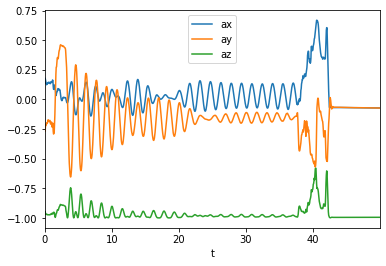

In [0]:
df.plot(x='t',y=['ax', 'ay','az'])

Visualizamos unicamente una region de interes

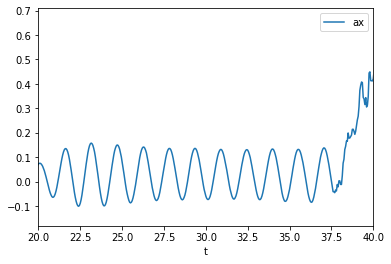

In [0]:
df.plot(x='t',y='ax',xlim=[20,40])

## Preprocesamiento y filtrado

Creamos una condicion logica para seleccionar la region de interes

In [0]:
df['t']<40

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: t, Length: 1000, dtype: bool

In [0]:
roi = df.loc[(df['t'] > 20) & (df['t'] < 37.5), ['t','ax']] #'ax':'t']


Visualizamos que es la region que nos interesa

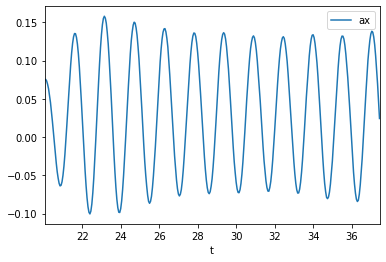

In [0]:
roi.plot(x='t',y='ax')

## Extraccion de caracteristicas o atributos

De los datos queremos extraer atributos o caracteristicas que nos ayuden a generar un bueno modelo. En este caso las diferencias en tiempo entre picos sucesivos indican el periodo de oscilacion (y se relacionan con la gravedad!)

In [0]:
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
import numpy as np


Extramos todos los maximos de la señal usando la funcion `find_peaks` disponble en la libreria `scipy.signal` y los visualizamos

In [0]:
z = roi.values[:,1]
peaks, _ = find_peaks(z, height=0)

La lista `peaks` que se obtiene de la funcion `find_peaks` es una lista de indices en donde se encontraron los picos de la señal

In [0]:
peaks

array([  1,  31,  62,  93, 125, 155, 186, 217, 248, 279, 309, 340])

Visualizamos los picos con una grafica

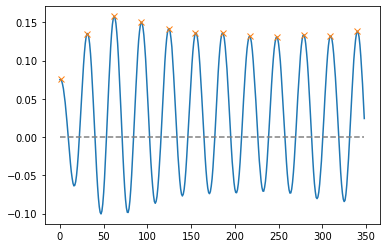

In [0]:
plt.plot(z)
plt.plot(peaks, z[peaks], "x")
plt.plot(np.zeros_like(z), "--", color="gray")
plt.show()

y determinamos los tiempos en los que ocurren los picos usando la lista de indices para obtener los tiempos correspondientes:

In [0]:
t = roi.values[:,0][peaks]

Las diferencias entre tiempos consecutivos son los periodos de la oscilacion

In [0]:
periodos = np.diff(t)
periodos

array([1.5 , 1.55, 1.55, 1.6 , 1.5 , 1.55, 1.55, 1.55, 1.55, 1.5 , 1.55])

### *RETO*

> Cuales son los periodos que se obtienen si en lugar de usar los maximos de la señal se usan los valores minimos? 

#### Otras forma de hacerlo 

Se puede obtener el mismo resultado con el siguiente codigo:

In [0]:
t[1:] - t[:-1]

array([1.5 , 1.55, 1.55, 1.6 , 1.5 , 1.55, 1.55, 1.55, 1.55, 1.5 , 1.55])

### Otros resultados (para los valientes)

El inverso del periodo es la frecuencia

In [0]:
print(1/periodos)

[0.60606061 0.71428571 0.64516129 0.71428571 0.66666667 0.66666667
 0.66666667 0.68965517 0.66666667 0.66666667 0.66666667 0.68965517
 0.68965517 0.66666667 0.64516129 0.68965517 0.66666667 0.66666667
 0.66666667 0.66666667 0.68965517 0.66666667 0.95238095]


Vamos a extraer el periodo a partir de una tecnica mas sofisticada basada en el analisis de Fourier

In [0]:
import numpy.fft as fft

In [0]:
# Time domain signal
N = z.size

In [0]:
Fs = 50000 # 50 milisecs
# DFT
X = np.fft.fft(z)
X_db = 20*np.log10(2*np.abs(X)/N)
#f = np.fft.fftfreq(N, 1/Fs)
f = np.arange(0, N)*Fs/N

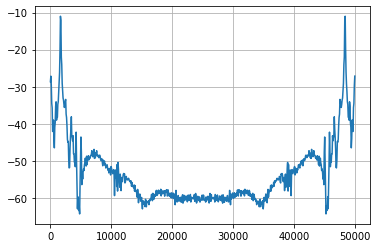

In [0]:
plt.plot(f, X_db)
plt.grid()
plt.show()

In [0]:
X_db.max()

-10.99769122773469

In [0]:
f[X_db.argmax()]

1645.2074391988556

In [0]:
f[X_db.argmax()]/1000.

1.6452074391988556

In [0]:
temporal_window = t[-1]-t[0] #seconds
temporal_window

33.85

In [0]:
N = len(z) #datapoints
T = 60./(temporal_window/N) #Sample rate average (readings/sec)

In [0]:
a=np.abs(fft.rfft(z, n=z.size))
a[0]=0 #Not sure if this is a good idea but seems to help with choppy data..
freqs = fft.rfftfreq(z.size, d=1./T)
freqs = np.divide(60,freqs)

max_freq = freqs[np.argmax(a)]
print("Peak found at %s second period (%s minutes)" % (max_freq, max_freq/60))

Peak found at 1.4717391304347827 second period (0.024528985507246377 minutes)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


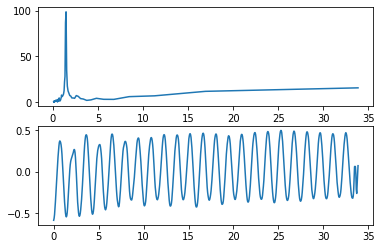

In [0]:
plt.subplot(211)
plt.plot(freqs,a)
plt.subplot(212)
plt.plot(np.linspace(0,temporal_window,z.size),z)
plt.show()